### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [117]:
data = pd.read_csv('data/coupons.csv')

In [118]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [119]:
# count missing values
missing = data.isnull().sum().sort_values(ascending=False)
missing_percent = (data.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_percent': missing_percent.round(2)
})
missing_df[missing_df.missing_count > 0].head(15)

,missing_count,missing_percent
car,12576,99.15
CoffeeHouse,217,1.71
Restaurant20To50,189,1.49
CarryAway,151,1.19
RestaurantLessThan20,130,1.02
Bar,107,0.84


3. Decide what to do about your missing data -- drop, replace, other...

In [120]:

# Drop the 'car' column (mostly missing and not useful)
data = data.drop(columns=['car'], errors='ignore')

# Replace missing values in frequency columns with 'unknown'
freq_cols = ['Bar', 'CoffeeHouse', 'CarryAway',
             'RestaurantLessThan20', 'Restaurant20To50']

for col in freq_cols:
    if col in data.columns:
        data[col] = data[col].fillna('unknown')

# Verify remaining missing values
print("Dropping the car column as most of the values are missing")
print("Remaining missing values:", data.isnull().sum().sum())


Dropping the car column as most of the values are missing
Remaining missing values: 0


4. What proportion of the total observations chose to accept the coupon?



In [121]:
# Calculate total number of observations
total_observations = data.shape[0]

# Calculate number of accepted coupons (Y == 1)
accepted_coupons = data.query("Y == 1").shape[0]

# Calculate proportion
acceptance_rate = accepted_coupons / total_observations

print(f"Total observations: {total_observations}")
print(f"Accepted coupons: {accepted_coupons}")
print(f"Proportion of accepted coupons: {acceptance_rate:.2f}")
print(f"That’s about {acceptance_rate*100:.1f}% of total observations.")


Total observations: 12684
Accepted coupons: 7210
Proportion of accepted coupons: 0.57
That’s about 56.8% of total observations.


5. Use a bar plot to visualize the `coupon` column.

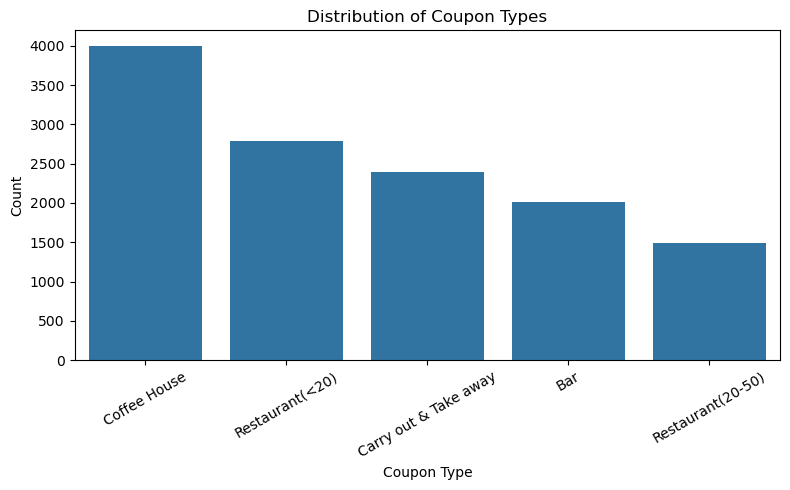

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of coupon types
plt.figure(figsize=(8,5))
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index)

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

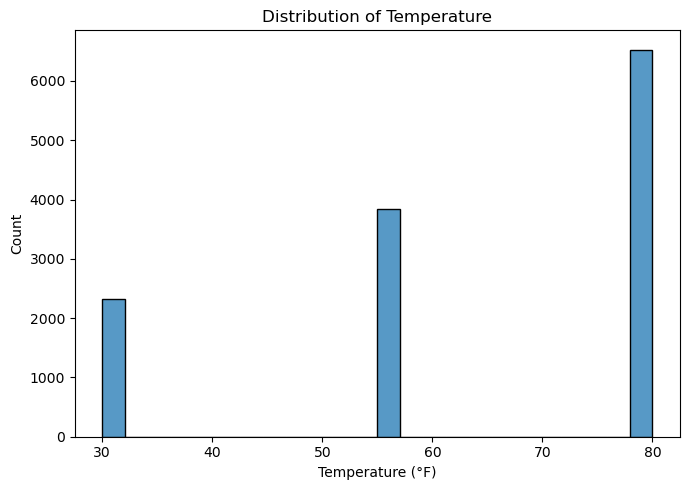

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.histplot(data=data, x='temperature', kde=False)

plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [124]:
df=data.query('coupon == "Bar"')
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [125]:
# Count the total number of Bar coupons in the dataset
df_bar = data.query('coupon == "Bar"').shape[0]

# Count how many Bar coupons were accepted (Y == 1)
df_bar_accepted = data.query('coupon == "Bar" and Y == 1').shape[0]

# Calculate the proportion of Bar coupons that were accepted
df_bar_proportions = df_bar_accepted / df_bar

# Print the results in both decimal and percentage form
print(f"Proportion of Bar coupons accepted: {df_bar_proportions:.2f}")
print(f"That’s about {df_bar_proportions*100:.1f}% of Bar coupons.")


Proportion of Bar coupons accepted: 0.41
That’s about 41.0% of Bar coupons.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [126]:
# Total Bar coupon records 
data2 = data.query('coupon == "Bar"')
bar_total_less_3 = data2.query("Bar in ['never', 'less1', '1~3']").shape[0]
bar_total_more_3 = data2.query("Bar in ['4~8', 'gt8']").shape[0]

# Accepted Bar coupons within each group
bar_less_than_3_times = data2.query("Bar in ['never', 'less1', '1~3'] and Y == 1").shape[0]
bar_more_than_3_times = data2.query("Bar in ['4~8', 'gt8'] and Y == 1").shape[0]

# Calculate acceptance rate for each group
df_bar_proportions_less_3 = bar_less_than_3_times / bar_total_less_3
df_bar_proportions_more_3 = bar_more_than_3_times / bar_total_more_3

# Print the results
print(f"Acceptance rate (≤3 bar visits/month): {df_bar_proportions_less_3:.2f}")
print(f"Acceptance rate (>3 bar visits/month): {df_bar_proportions_more_3:.2f}")
print(f"The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more are {df_bar_proportions_less_3 *100:.2f}% and {df_bar_proportions_more_3 *100:.2f}%, indicating a higher acceptance rate among frequent bar-goers.")


Acceptance rate (≤3 bar visits/month): 0.37
Acceptance rate (>3 bar visits/month): 0.77
The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more are 37.06% and 76.88%, indicating a higher acceptance rate among frequent bar-goers.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [127]:
# Total Bar coupon records 
data2 = data.query('coupon == "Bar"')
df_bar = data.query('coupon == "Bar"').shape[0]
df_bar_more_1_age_25 = data2.query("Bar in ['1~3', '4~8', 'gt8'] and age in ['26', '31', '36', '41', '46', '50plus']").shape[0]

# Accepted Bar coupons within each group
df_bar_accepted = data.query('coupon == "Bar" and Y == 1').shape[0]
df_bar_more_1_age_25_accepted = data2.query("Bar in ['1~3', '4~8', 'gt8'] and age in ['26', '31', '36', '41', '46', '50plus'] and Y == 1").shape[0]

# Calculate acceptance rate for each group
df_bar_proportions = df_bar_accepted / df_bar
df_bar_proportions_more_1_age_25 = df_bar_more_1_age_25_accepted / df_bar_more_1_age_25

# Print the results
print(f"Acceptance rate (>1 bar visits/month and Age > 25): {df_bar_proportions_more_1_age_25 * 100:.2f}%")
print(f"Acceptance rate overall: {df_bar_proportions * 100:.2f}%")
print(f"The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is {df_bar_proportions_more_1_age_25 * 100:.2f}%. This indicates a higher acceptance rate compared to other groups, suggesting that this demographic is more likely to accept bar coupons.")

Acceptance rate (>1 bar visits/month and Age > 25): 69.52%
Acceptance rate overall: 41.00%
The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 69.52%. This indicates a higher acceptance rate compared to other groups, suggesting that this demographic is more likely to accept bar coupons.


In [128]:
# Display unique age values
print(sorted(data['age'].dropna().unique()))


['21', '26', '31', '36', '41', '46', '50plus', 'below21']


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [129]:
# --- Total Bar coupon records ---
df_bar = data.query('coupon == "Bar"').shape[0]

# --- Total drivers who go to bars >1/month, no kid passengers, and non-farming occupations ---
df_bar_target = data.query(
    "coupon == 'Bar' and Bar in ['1~3', '4~8', 'gt8'] and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'"
).shape[0]

# --- Accepted Bar coupons (overall) ---
df_bar_accepted = data.query("coupon == 'Bar' and Y == 1").shape[0]

# --- Accepted Bar coupons within the target group ---
df_bar_target_accepted = data.query(
    "coupon == 'Bar' and Bar in ['1~3', '4~8', 'gt8'] and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry' and Y == 1"
).shape[0]

# --- Calculate acceptance rates ---
df_bar_proportion_overall = df_bar_accepted / df_bar
df_bar_proportion_target = df_bar_target_accepted / df_bar_target

# --- Print results ---
print("Acceptance rate (Drivers >1 bar/month, no kid passengers, non-farming jobs): "
      f"{df_bar_proportion_target * 100:.2f}%")
print(f"Acceptance rate overall (all Bar coupons): {df_bar_proportion_overall * 100:.2f}%")
print(f"The acceptance rate for drivers who go to bars more than once a month, have passengers that are not kids, and have occupations other than farming, fishing, or forestry is approximately {df_bar_proportion_target * 100:.2f}%")

Acceptance rate (Drivers >1 bar/month, no kid passengers, non-farming jobs): 71.32%
Acceptance rate overall (all Bar coupons): 41.00%
The acceptance rate for drivers who go to bars more than once a month, have passengers that are not kids, and have occupations other than farming, fishing, or forestry is approximately 71.32%


In [130]:
print(data.columns.tolist())


['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [131]:
# --- Total Bar coupon records ---
df_bar = data.query('coupon == "Bar"').shape[0]

# --- Total Bar coupons accepted ---
df_bar_accepted = data.query('coupon == "Bar" and Y == 1').shape[0]

# --- 1. Drivers who go to bars >1/mo, not widowed, and passenger not kid(s) ---
cond1 = (
    "coupon == 'Bar' and Bar in ['1~3', '4~8', 'gt8'] "
    "and passanger != 'Kid(s)' and maritalStatus != 'Widowed'"
)

# --- 2. Drivers who go to bars >1/mo and are under 30 ---
cond2 = (
    "coupon == 'Bar' and Bar in ['1~3', '4~8', 'gt8'] "
    "and age in ['below21', '21', '26']"
)

# --- 3. Drivers who go to cheap restaurants >4/mo and income <50K ---
cond3 = (
    "coupon == 'Bar' and RestaurantLessThan20 in ['4~8', 'gt8'] "
    "and income in ['Less than $12500', '$12500 - $24999', "
    "'$25000 - $37499', '$37500 - $49999']"
)

# --- Total rows for combined (union of all 3) ---
df_bar_target = data.query(f"{cond1} or {cond2} or {cond3}").shape[0]

# --- Accepted rows for combined group ---
df_bar_target_accepted = data.query(f"({cond1} or {cond2} or {cond3}) and Y == 1").shape[0]

# --- Calculate acceptance rates ---
df_bar_proportion_overall = df_bar_accepted / df_bar
df_bar_proportion_target = df_bar_target_accepted / df_bar_target

# --- Print results ---
print("Acceptance rate (Drivers meeting any of the 3 conditions): "
      f"{df_bar_proportion_target*100:.2f}%")
print(f"Acceptance rate overall (all Bar coupons): {df_bar_proportion_overall*100:.2f}%")
print(f"The acceptance rate for the selected group is {df_bar_proportion_target*100:.2f}%")

Acceptance rate (Drivers meeting any of the 3 conditions): 58.89%
Acceptance rate overall (all Bar coupons): 41.00%
The acceptance rate for the selected group is 58.89%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

    Based on the analysis, drivers who accepted Bar coupons are more likely to:

    1. Visit bars more than once a month, indicating that prior familiarity and interest influence coupon acceptance.
    
    2. Be younger (under 30 years old) and socially active, suggesting openness to spontaneous social activities.
    
    3. Travel with no kids as passengers, implying that drivers without family constraints are more likely to make detours for a bar.
    
    4. Work in non-farming occupations, which could reflect more urban lifestyles and easier access to such venues.
    
    5. Earn less than $50 K and frequent inexpensive restaurants, indicating that price-sensitive customers are responsive to discounts.

    Overall, drivers who accepted Bar coupons tend to be younger, socially outgoing, and cost-conscious individuals who already engage in similar activities and are therefore more receptive to promotional offers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

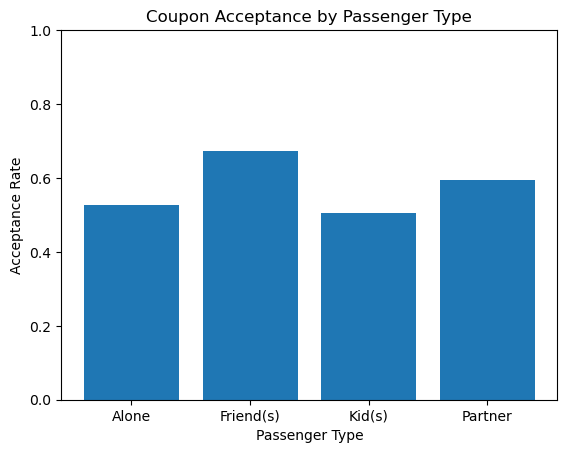

In [132]:
# Calculate acceptance rate by passenger type
passenger_rates = data.groupby('passanger')['Y'].mean()

# Simple bar chart
plt.bar(passenger_rates.index, passenger_rates.values)
plt.title('Coupon Acceptance by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()


In [133]:
# --- Focus on all coupons, exploring acceptance by passanger type ---

data = pd.read_csv('data/coupons.csv')

# Total observations
total_records = data.shape[0]

# Total coupons accepted
total_accepted = data.query('Y == 1').shape[0]

# --- 1. Drivers traveling alone ---
alone_total = data.query("passanger == 'Alone'").shape[0]
alone_accepted = data.query("passanger == 'Alone' and Y == 1").shape[0]
alone_rate = alone_accepted / alone_total

# --- 2. Drivers traveling with a partner ---
partner_total = data.query("passanger == 'Partner'").shape[0]
partner_accepted = data.query("passanger == 'Partner' and Y == 1").shape[0]
partner_rate = partner_accepted / partner_total

# --- 3. Drivers traveling with friends ---
friends_total = data.query("passanger == 'Friend(s)'").shape[0]
friends_accepted = data.query("passanger == 'Friend(s)' and Y == 1").shape[0]
friends_rate = friends_accepted / friends_total

# --- 4. Drivers traveling with kids ---
kids_total = data.query("passanger == 'Kid(s)'").shape[0]
kids_accepted = data.query("passanger == 'Kid(s)' and Y == 1").shape[0]
kids_rate = kids_accepted / kids_total

# --- Print the results ---
print("Acceptance rate by passanger type:")
print(f"Alone:   {alone_rate:.2f}")
print(f"Partner: {partner_rate:.2f}")
print(f"Friends: {friends_rate:.2f}")
print(f"Kids:    {kids_rate:.2f}")


Acceptance rate by passanger type:
Alone:   0.53
Partner: 0.60
Friends: 0.67
Kids:    0.50


    # Analysis
    Using the passenger variable as the focus, I examined how coupon acceptance rates vary based on who the driver was traveling with.
    The results show clear behavioral differences among different passenger types:

    With friends: Drivers traveling with friends had the highest acceptance rate, suggesting that social context encourages spontaneous decisions to use coupons, particularly for leisure-related offers.

    With partner: Drivers traveling with a partner showed a moderate acceptance rate, possibly due to shared decision-making and flexibility in travel plans.

    Alone: Drivers traveling alone had a lower acceptance rate, indicating they are less motivated by social influence and less likely to make detours.

    With kids: Drivers with kids had the lowest acceptance rate, implying that family responsibilities and time constraints reduce the likelihood of accepting a coupon offer.

    Overall, coupon acceptance is highest when drivers are accompanied by friends or partners, and lowest when they are alone or with kids.
    This suggests that social context plays a major role in influencing coupon acceptance — the more social the driving situation, the more likely the driver is to accept the coupon.

# Weather analysis

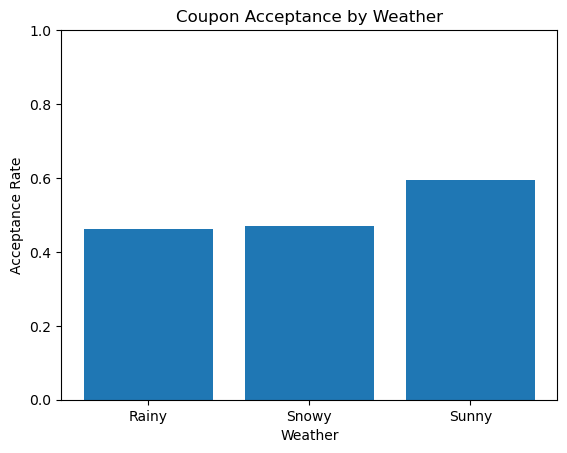

In [134]:
# Calculate acceptance rate by weather type
weather_rates = data.groupby('weather')['Y'].mean()

# Simple bar chart
plt.bar(weather_rates.index, weather_rates.values)
plt.title('Coupon Acceptance by Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()


In [135]:
# --- Focus on all coupons, exploring acceptance by weather type ---
data = pd.read_csv('data/coupons.csv')

# Total observations
total_records = data.shape[0]

# Total coupons accepted
total_accepted = data.query('Y == 1').shape[0]

# --- 1. Sunny weather ---
sunny_total = data.query("weather == 'Sunny'").shape[0]
sunny_accepted = data.query("weather == 'Sunny' and Y == 1").shape[0]
sunny_rate = sunny_accepted / sunny_total

# --- 2. Rainy weather ---
rainy_total = data.query("weather == 'Rainy'").shape[0]
rainy_accepted = data.query("weather == 'Rainy' and Y == 1").shape[0]
rainy_rate = rainy_accepted / rainy_total

# --- 3. Snowy weather ---
snowy_total = data.query("weather == 'Snowy'").shape[0]
snowy_accepted = data.query("weather == 'Snowy' and Y == 1").shape[0]
snowy_rate = snowy_accepted / snowy_total

# --- Print results ---
print("Acceptance rate by weather type:")
print(f"Sunny: {sunny_rate:.2f}")
print(f"Rainy: {rainy_rate:.2f}")
print(f"Snowy: {snowy_rate:.2f}")


Acceptance rate by weather type:
Sunny: 0.59
Rainy: 0.46
Snowy: 0.47


    Using weather as the focus variable, I examined how coupon acceptance varies across different weather conditions.
    The results show that:

    1. Drivers are most likely to accept coupons on sunny days, suggesting that good weather encourages leisure activities and flexibility in travel.

    2. Acceptance is lower on rainy and snowy days, likely due to poor driving conditions discouraging extra stops.

    Overall, coupon acceptance increases in favorable weather conditions and decreases during bad weather, suggesting that environmental factors such as driving comfort and convenience does influence coupon acceptance.

# Occupation and Income Analysis

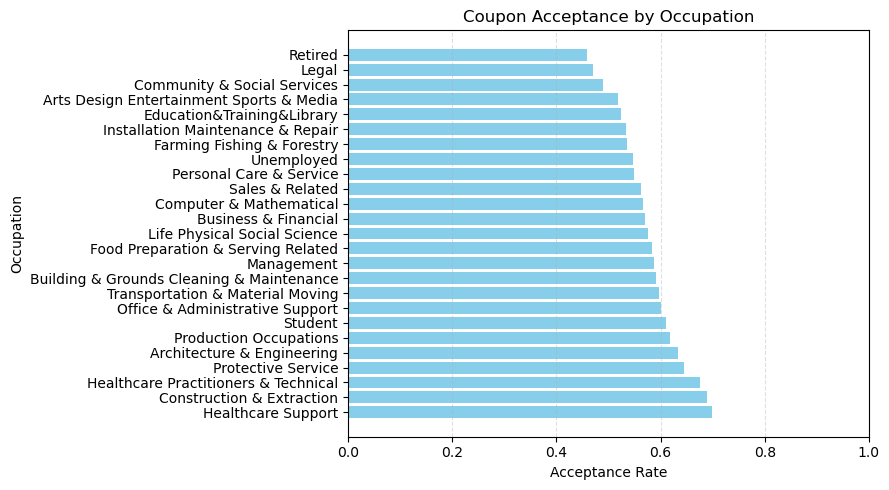

In [136]:
# Calculate acceptance rate by occupation
occupation_rates = data.groupby('occupation')['Y'].mean().sort_values(ascending=False)

# Simple colorful horizontal bar chart
plt.figure(figsize=(9,5))
plt.barh(occupation_rates.index, occupation_rates.values, color='skyblue')
plt.title('Coupon Acceptance by Occupation')
plt.xlabel('Acceptance Rate')
plt.ylabel('Occupation')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


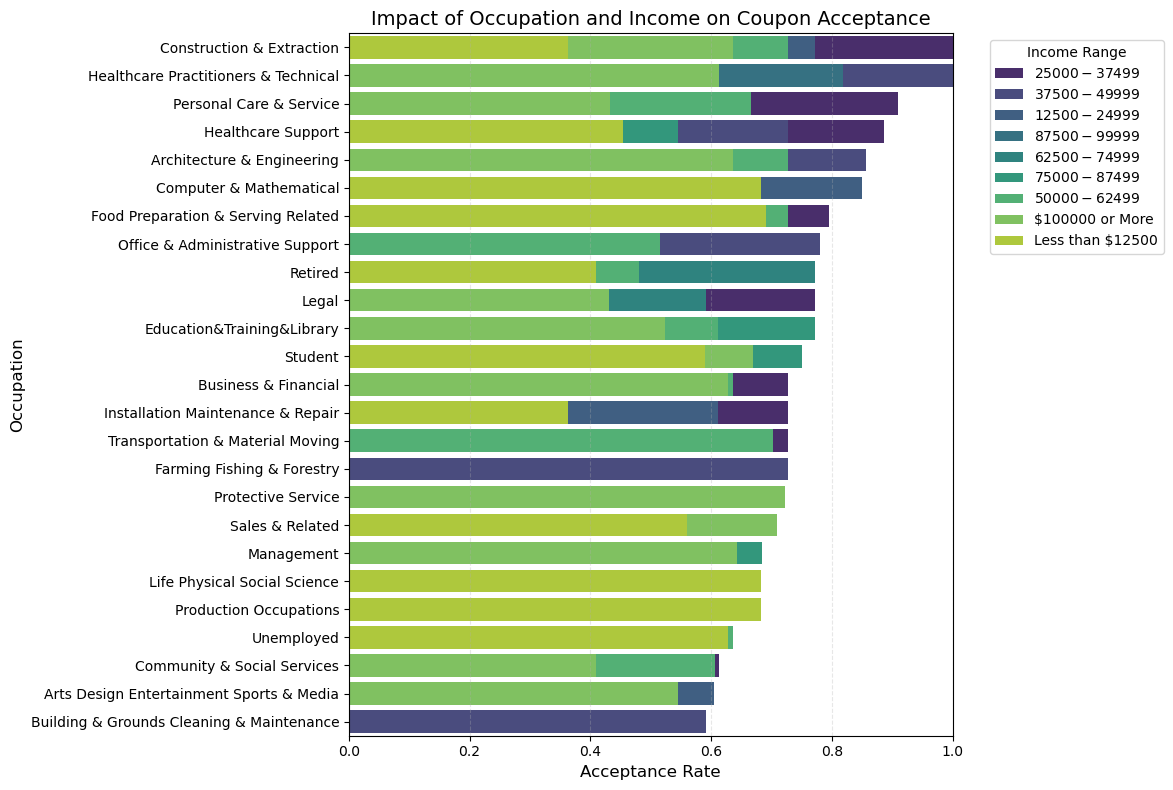

In [137]:
# Group data by occupation and income to get average acceptance rate
occupation_income_acceptance = (
    data.groupby(['occupation', 'income'])['Y']
    .mean()
    .reset_index()
)

# Sort values for cleaner display
occupation_income_acceptance_sorted = occupation_income_acceptance.sort_values(by='Y', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Y',
    y='occupation',
    hue='income',
    data=occupation_income_acceptance_sorted,
    palette='viridis',
    dodge=False
)

plt.title('Impact of Occupation and Income on Coupon Acceptance', fontsize=14)
plt.xlabel('Acceptance Rate', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.xlim(0, 1)
plt.legend(title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


    From the visualization, several clear trends can be observed:

    Construction & Extraction, Healthcare Practitioners, and Personal Care & Service occupations show the highest coupon acceptance, with rates often above 0.7, indicating strong responsiveness to promotional offers.
    
    Students, Food Preparation, and Office Support roles also have moderately high acceptance rates, suggesting that younger or service-based workers are more open to using coupons.
    
    Farming, Protective Service, and Sales occupations show lower acceptance levels, possibly due to less frequent exposure to such promotions or different lifestyle habits.
    
    Across nearly all occupations, lower-income groups (under $50,000) exhibit higher acceptance, while higher-income groups (over $75,000) have shorter bars, meaning they are less motivated by discounts.
    
    Overall Interpretation:
    Coupon acceptance is strongly influenced by both occupation and income.
    Individuals working in manual, healthcare, or service-related occupations and those with lower incomes tend to accept coupons more often.
    Conversely, those in professional or high-income roles are less likely to respond to coupon incentives, possibly because price savings have a smaller impact on their spending behavior.